In [1]:
%matplotlib widget 
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [33]:
def plot_2D_contour(x, y, z):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')
    return ax

In [37]:
DtestCSR = CSR2D(input_file= 'input/dipole_facet_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  =0.2)

Finish step 2 in 0.1598353385925293 seconds
Finish step 3 in 0.16719985008239746 seconds
Finish step 4 in 0.18404483795166016 seconds


In [38]:
DtestCSR.beam.sigma_z

2.1702352711033106e-05

In [39]:
t = DtestCSR.beam.position
print(t)
s  = t +2*DtestCSR.beam.sigma_z
x = (s-t)*DtestCSR.beam.slope[0] +1*DtestCSR.beam.sigma_x


0.30000000000000004


AttributeError: 'Beam' object has no attribute 'sigma_0'

In [36]:
DtestCSR.formation_length

1.79494766288566

In [22]:
xp, sp, CSR_integrand_z1, CSR_integrand_x1,CSR_integrand_z2, CSR_integrand_x2  = DtestCSR.get_CSR_wake(s, x, debug = True)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

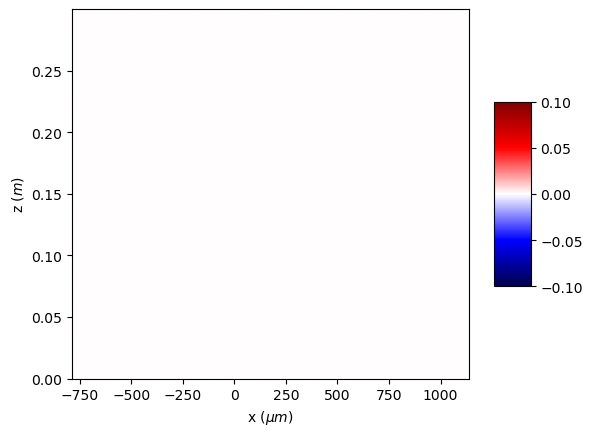

In [23]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z1.T)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

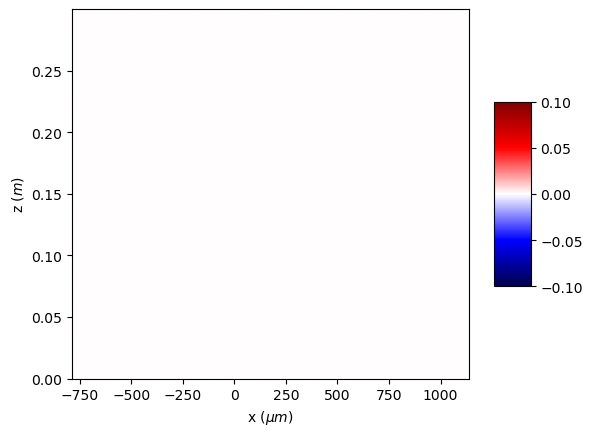

In [24]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z2.T)

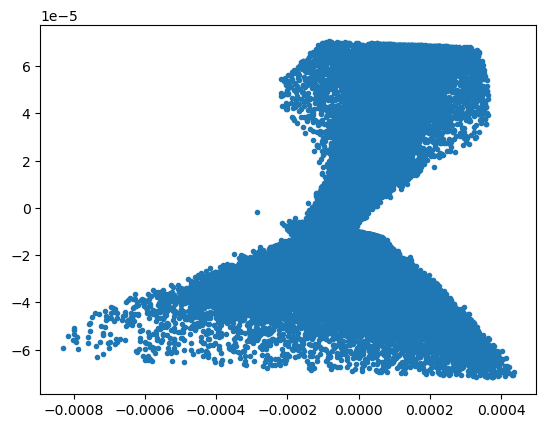

In [25]:
plt.plot(DtestCSR.beam.x, DtestCSR.beam.z, '.')

In [26]:
DtestCSR.beam.slope


array([ 1.84754681e+00, -2.83665209e-05])

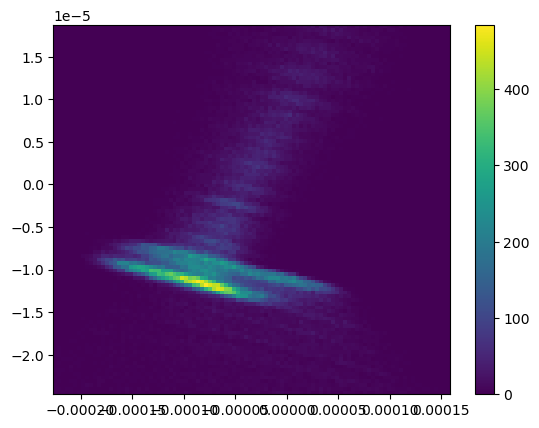

In [27]:
sigx = DtestCSR.beam.sigma_x
meanx  = DtestCSR.beam.mean_x
meanz = DtestCSR.beam.mean_z
sigz = DtestCSR.beam.sigma_z
_=plt.hist2d(DtestCSR.beam.x, DtestCSR.beam.z, bins = [100, 100], range = [[meanx-2*sigx, meanx + 2*sigx], [meanz-sigz, meanz+sigz]])
plt.colorbar()

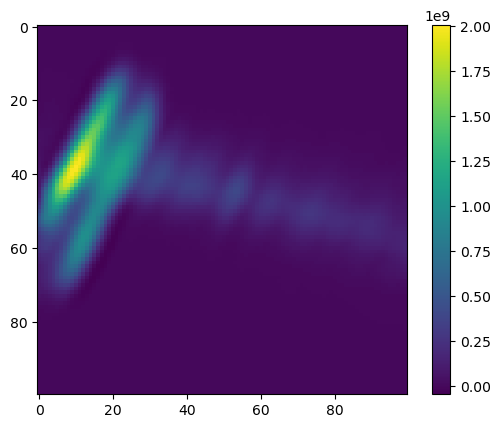

In [31]:
plt.imshow(DtestCSR.DF_tracker.density)
plt.colorbar()

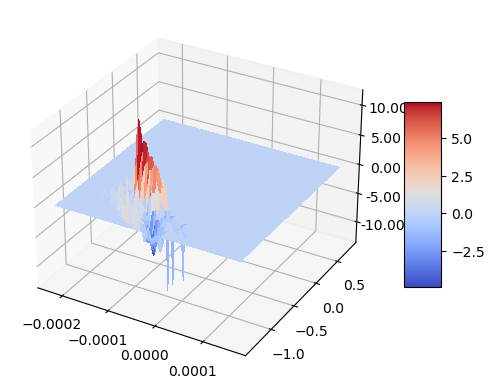

In [30]:
from tools import plot_surface
plot_surface(x = DtestCSR.DF_tracker.x_grids, y = DtestCSR.DF_tracker.z_grids, z = DtestCSR.DF_tracker.vx_x.T)

## plot near singularity

C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\CSR.py:451: RuntimeWarning: invalid value encountered in sqrt
  term = (- X0_s**2 * n_vec_sp_y**2 * k**2 + X0_s**2 +


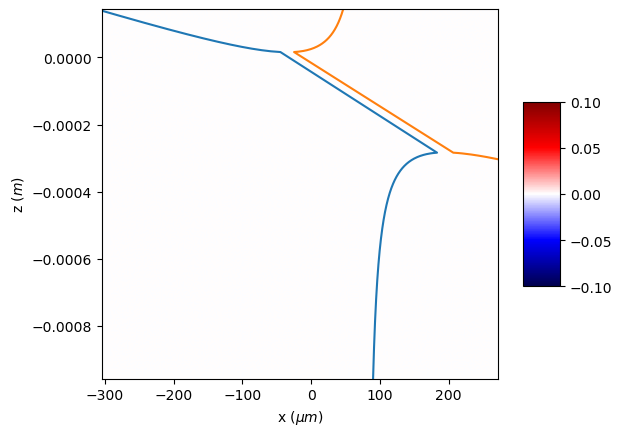

In [43]:
sp = np.linspace(s- 0.001, s + 0.0001, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -3*sigx
xR = x + 3*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')




xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## plot who range

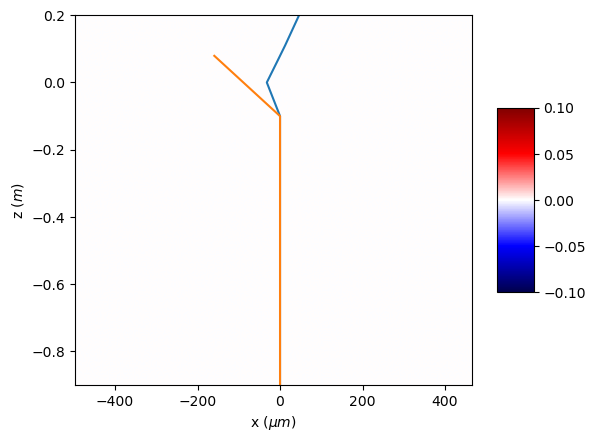

In [44]:
sp = np.linspace(s-1.2, s -0.1, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -5*sigx
xR = x + 5*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 ))
ax.plot(xp2*1e6, (sp2 ))

## Plot area 1

In [12]:
DtestCSR.formation_length

1.3737046326746893

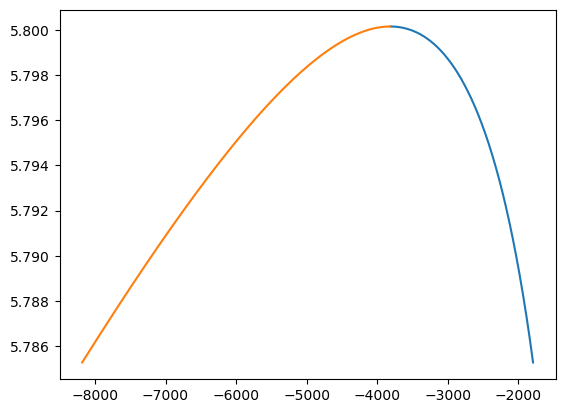

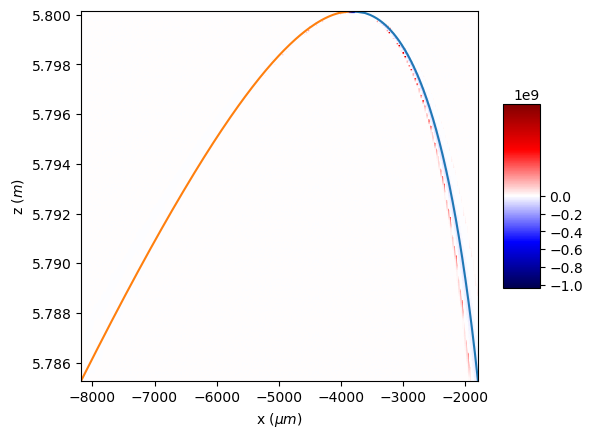

In [82]:


tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = np.abs(10*DtestCSR.beam.sigma_x/tan_theta)

sp = np.linspace(np.max((s - 100*DtestCSR.beam.sigma_z, 0)), s + 100*DtestCSR.beam.sigma_z , 100000)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)
ind  = (np.abs(xp1) < 5*DtestCSR.beam.sigma_x) &(np.abs(xp2) < 5*DtestCSR.beam.sigma_x)
plt.figure()
plt.plot(xp1*1e6, sp)
plt.plot(xp2*1e6, sp)

if sum(ind) == len(xp1):   # The two region are parallel and not tilted
    xmin = x - 5*DtestCSR.beam.sigma_x
    xmax = x + 5*DtestCSR.beam.sigma_x
    smin = s - 5*DtestCSR.beam.sigma_z
    smax = s + 5*DtestCSR.beam.sigma_z

else:
    xp1_valid = xp1[ind]
    xp2_valid = xp2[ind]
    sp_valid = sp[ind]
    smin = np.min(sp_valid)
    smax = np.max(sp_valid)
    xmin = np.min((np.min(xp1_valid), np.min(xp2_valid)))
    xmax = np.max((np.max(xp1_valid), np.max(xp2_valid)))


sp = np.linspace(smin, smax, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_x.T)
ax.plot(xp1*1e6, sp1 )
ax.plot(xp2*1e6, sp2 )

## Plot area 2

In [83]:
xp1

array([-0.00178962, -0.00179281, -0.00179601, -0.00179923, -0.00180247,
       -0.00180572, -0.00180898, -0.00181226, -0.00181556, -0.00181888,
       -0.00182221, -0.00182555, -0.00182892, -0.00183232, -0.00183574,
       -0.00183919, -0.00184265, -0.00184613, -0.00184963, -0.00185314,
       -0.00185668, -0.00186023, -0.0018638 , -0.00186738, -0.00187099,
       -0.00187461, -0.00187826, -0.00188192, -0.0018856 , -0.00188931,
       -0.00189303, -0.00189677, -0.00190053, -0.00190431, -0.00190811,
       -0.00191194, -0.00191578, -0.00191964, -0.00192353, -0.00192744,
       -0.00193137, -0.00193532, -0.00193929, -0.00194329, -0.00194731,
       -0.00195135, -0.00195542, -0.00195951, -0.00196362, -0.00196775,
       -0.00197191, -0.0019761 , -0.00198031, -0.00198455, -0.00198881,
       -0.00199309, -0.0019974 , -0.00200174, -0.00200611, -0.0020105 ,
       -0.00201492, -0.00201936, -0.00202384, -0.00202834, -0.00203287,
       -0.00203743, -0.00204202, -0.00204664, -0.00205129, -0.00

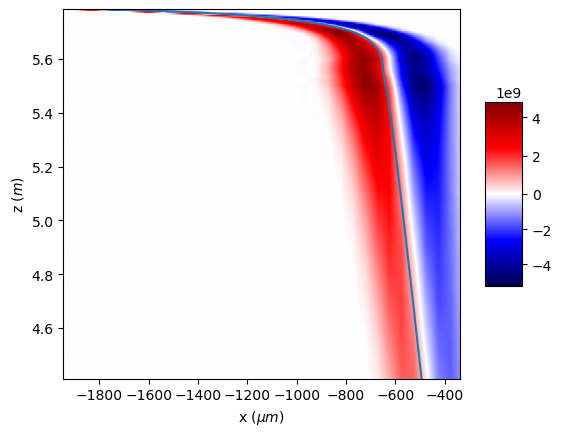

In [85]:

sp = np.linspace(np.max((smin - DtestCSR.formation_length, 0)), smin, 200)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

xL = np.min(xp1) - 3*DtestCSR.beam.sigma_x
xR = np.max(xp1) + 3*DtestCSR.beam.sigma_x




xp = np.linspace(xL  , xR, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')



sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = sp, z = CSR_integrand_z.T)
ax.plot(xp1*1e6, sp1 )

## Plot area 1 method 2

In [78]:
5*DtestCSR.beam._sigma_x

0.009509915995370035

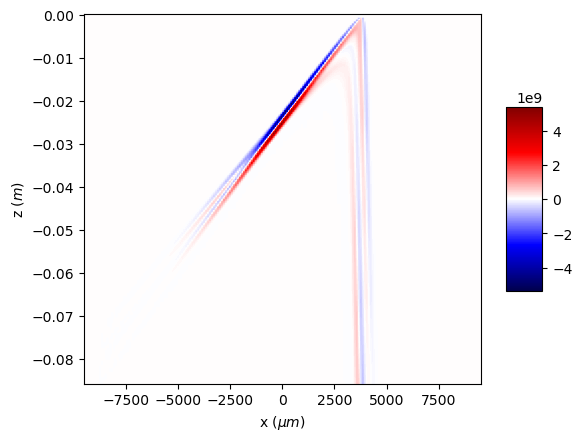

In [91]:
tan_theta = DtestCSR.beam._slope[0]
x0 = DtestCSR.beam.mean_x
if np.abs(tan_theta) <= 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
    s1 = s - 3*DtestCSR.beam._sigma_z
    s2 = s + 3*DtestCSR.beam._sigma_z
    xmin = x - 3*DtestCSR.beam._sigma_x
    xmax = X + 3*DtestCSR.beam._sigma_x
else:
    if tan_theta >= 0:
        tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
        d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
        s1 = np.max((0,s - d))
        s2 = s + 3*DtestCSR.beam._sigma_z
        xmax = x0 + 5*DtestCSR.beam._sigma_x
        xmin = x - 3*DtestCSR.beam._sigma_x
        
    else:
        tan_alpha = 2*tan_theta/(1-tan_theta**2)
        d = -(x0 - x - 5*DtestCSR.beam._sigma_x)/tan_alpha
        s1 = np.max((0,s - d))
        s2 = s + 3*DtestCSR.beam._sigma_z
        xmin = x0 - 5*DtestCSR.beam._sigma_x
        xmax = x + 3*DtestCSR.beam._sigma_x
sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)      

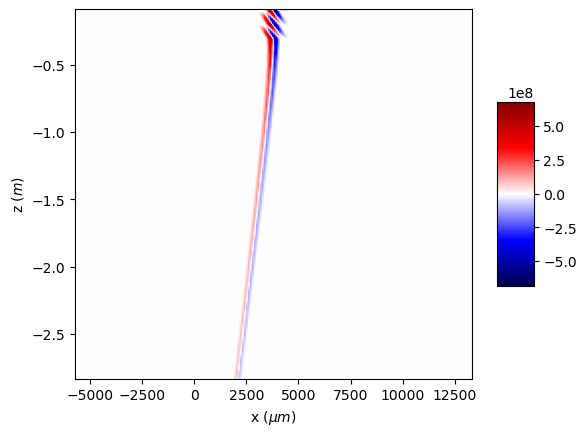

In [93]:
s3 = np.max((0, s1 - 2*DtestCSR.formation_length))
xmin = x - 5*DtestCSR.beam._sigma_x
xmax = x + 5*DtestCSR.beam._sigma_x
sp = np.linspace(s3, s1, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))

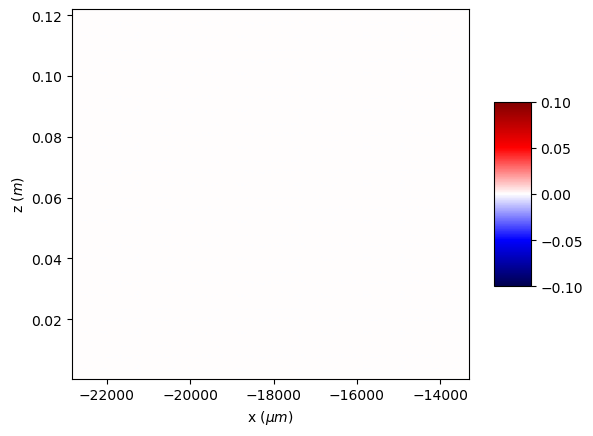

In [81]:
tan_a = DtestCSR.beam._slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz =10*DtestCSR.beam._sigma_x/tan_theta
x1 = x - dz*tan_theta
if tan_theta > 0:
    x2 = x + 5*DtestCSR.beam._sigma_x
    xmin, xmax = x1, x2
else:
    x2 = x - 5*DtestCSR.beam._sigma_x
    xmin, xmax = x2, x1

s1 = np.max((0,s - dz))

s2 = s + 3*DtestCSR.beam.sigma_z




    



sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))